## SVM_Salary_Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [16]:
train_data = pd.read_csv('C:/Users/home/SVM/SalaryData_Train(1).csv')
test_data = pd.read_csv('C:/Users/home/SVM/SalaryData_Test(1).csv')

In [17]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [19]:
train_data.shape

(30161, 14)

In [20]:
test_data.shape

(15060, 14)

In [21]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [24]:
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (train_data[c].value_counts())
    print('\n')

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-cler

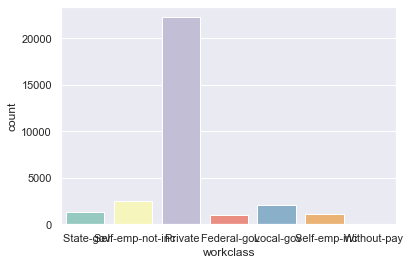

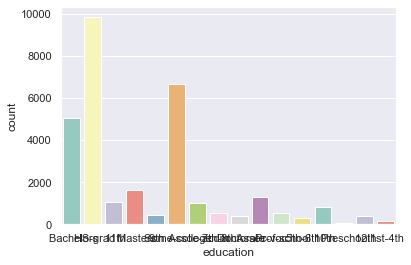

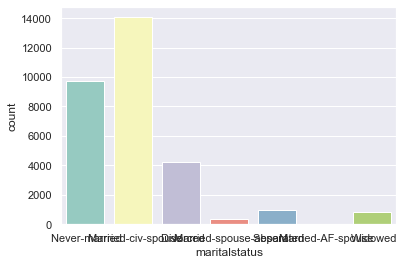

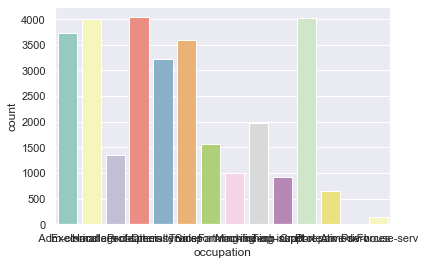

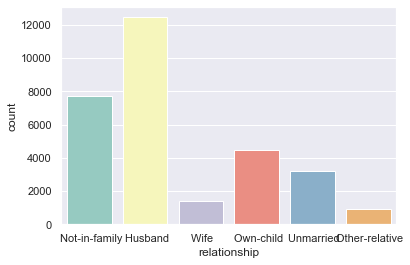

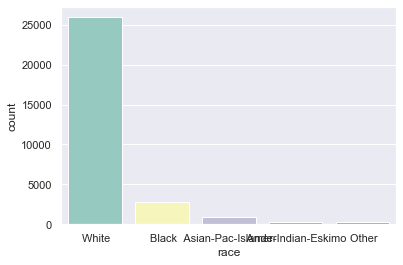

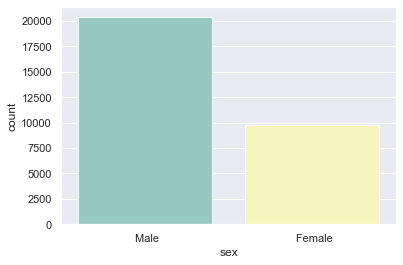

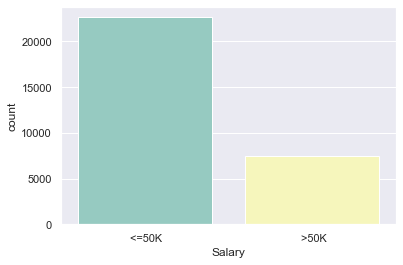

In [25]:
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = train_data, palette = 'Set3')

<AxesSubplot:title={'center':'Distribution of AGE'}, xlabel='age', ylabel='Count'>

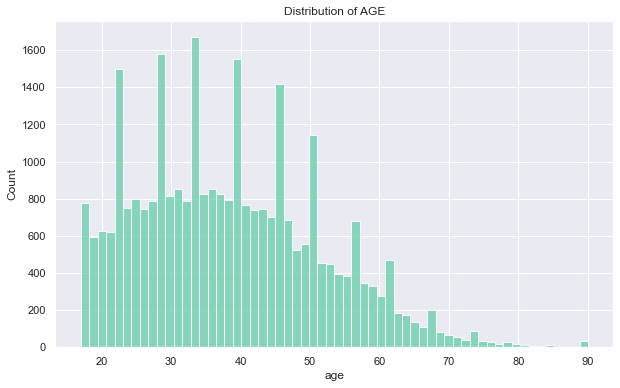

In [26]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title("Distribution of AGE")
sns.histplot(train_data['age'],color='#66CDAA')

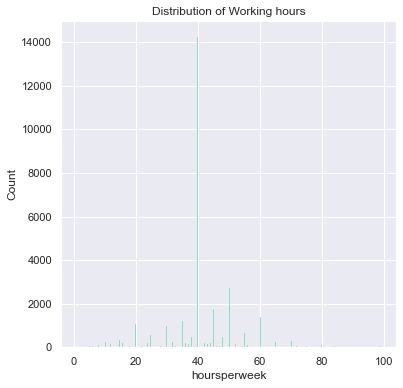

In [27]:
plt.figure(figsize=(6,6))
plt.title("Distribution of Working hours")
sns.histplot(train_data['hoursperweek'],color='#66CDAA');

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


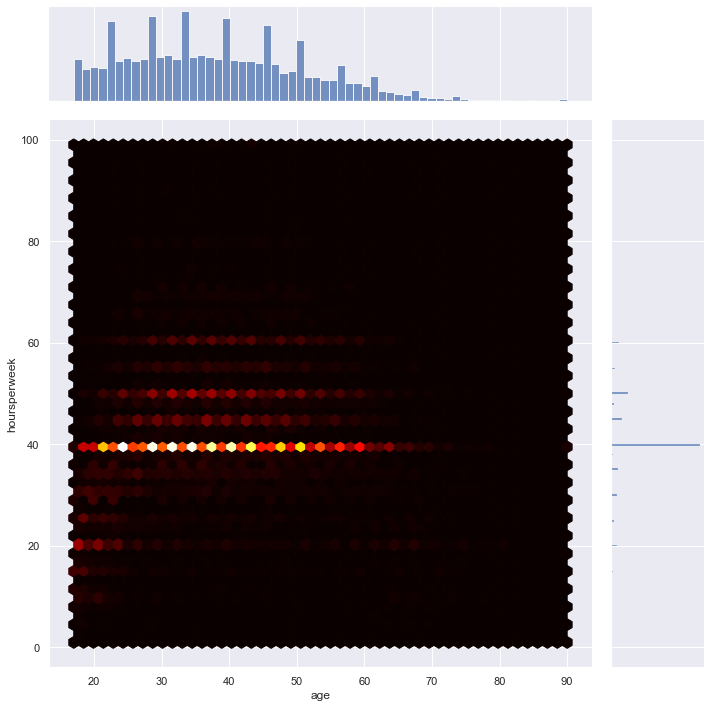

In [28]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = train_data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

In [29]:
#le= LabelEncoder()
#train_data['workclass'] = le.fit_transform(salary_data['workclass'])  
#train_data['education'] = le.fit_transform(salary_data['education'])
#train_data['maritalstatus'] = le.fit_transform(salary_data['maritalstatus']) 
#train_data['occupation'] = le.fit_transform(salary_data['occupation']) 
#train_data['relationship'] = le.fit_transform(salary_data['relationship'])
#train_data['race'] = le.fit_transform(salary_data['race'])
#train_data['sex'] = le.fit_transform(salary_data['sex'])
#train_data['native'] = le.fit_transform(salary_data['native'])
#train_data['Salary'] = le.fit_transform(salary_data['Salary'])
#train_data.head()
from sklearn.preprocessing import LabelEncoder
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [30]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Salary', ylabel='count'>

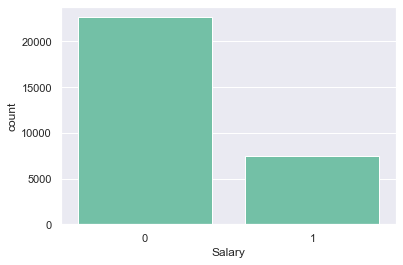

In [31]:
sns.countplot(train_data['Salary'],color='#66CDAA')

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Salary', ylabel='count'>

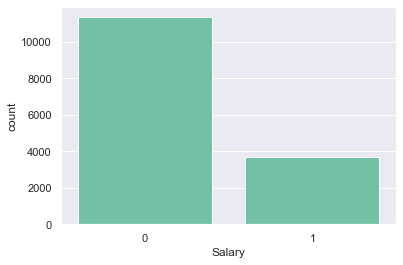

In [32]:
sns.countplot(test_data['Salary'],color='#66CDAA')

<AxesSubplot:title={'center':'Correalation between Features'}>

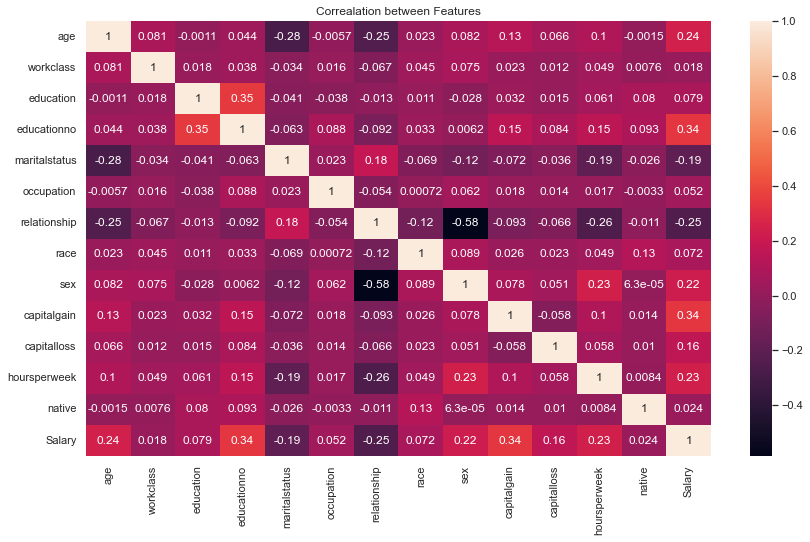

In [33]:
corr=train_data.corr()
plt.figure(figsize=(14,8))
plt.title("Correalation between Features")
sns.heatmap(corr,annot=True)

<AxesSubplot:title={'center':'Correalation between Features'}>

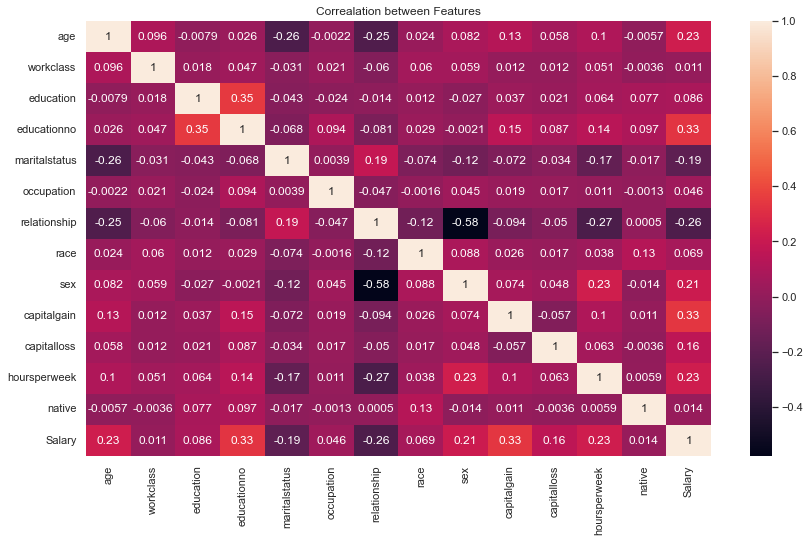

In [34]:
corr=test_data.corr()
plt.figure(figsize=(14,8))
plt.title("Correalation between Features")
sns.heatmap(corr,annot=True)

In [35]:
drop_elements = ['native', 'Salary']
X = train_data.drop(drop_elements, axis=1)

In [36]:
y = train_data['Salary']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
from sklearn import metrics

svc = SVC()
svc.fit(X_train, y_train)
# make predictions
prediction = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5654
           1       0.84      0.30      0.45      1887

    accuracy                           0.81      7541
   macro avg       0.83      0.64      0.67      7541
weighted avg       0.82      0.81      0.78      7541

[[5548  106]
 [1312  575]]
Accuracy: 0.811961278345047
Precision: 0.8443465491923642
Recall: 0.3047164811870694


In [39]:
drop_elements = ['native', 'Salary']
X_new = test_data.drop(drop_elements, axis=1)

y_new = test_data['Salary']

In [40]:
new_prediction = svc.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     11360
           1       0.86      0.29      0.43      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.64      0.66     15060
weighted avg       0.82      0.81      0.78     15060

[[11188   172]
 [ 2635  1065]]
Accuracy: 0.8136122177954848
Precision: 0.8609539207760711
Recall: 0.28783783783783784


## Building SVM model with Hyper Parameters kernel='rbf',gamma=15, C=1

In [41]:
model = SVC(kernel='rbf',gamma=15, C=1)

In [42]:
model.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      5654
           1       0.56      0.09      0.15      1887

    accuracy                           0.75      7541
   macro avg       0.66      0.53      0.50      7541
weighted avg       0.71      0.75      0.68      7541

[[5524  130]
 [1721  166]]
Accuracy: 0.7545418379525262
Precision: 0.5608108108108109
Recall: 0.08797032326444092


In [43]:
new_prediction = model.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     11360
           1       0.56      0.08      0.14      3700

    accuracy                           0.76     15060
   macro avg       0.66      0.53      0.50     15060
weighted avg       0.72      0.76      0.68     15060

[[11137   223]
 [ 3413   287]]
Accuracy: 0.7585657370517929
Precision: 0.5627450980392157
Recall: 0.07756756756756757
